In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, losses
import matplotlib.pyplot as plt


In [3]:
(train_images,train_lables), (test_images, test_lables) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 121s 1us/step


In [4]:
train_images,test_images = train_images/250.0,test_images/250.0

In [21]:
train_images.shape

(50000, 32, 32, 3)

In [31]:
train_lables.shape

(50000, 1)

In [22]:
import numpy as np

In [28]:
np.unique(train_lables)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.02].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.02..1.016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08..1.02].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.008].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.032..1.008].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.016].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.008..1.004].
Clipping input data to the valid range for imshow with RG

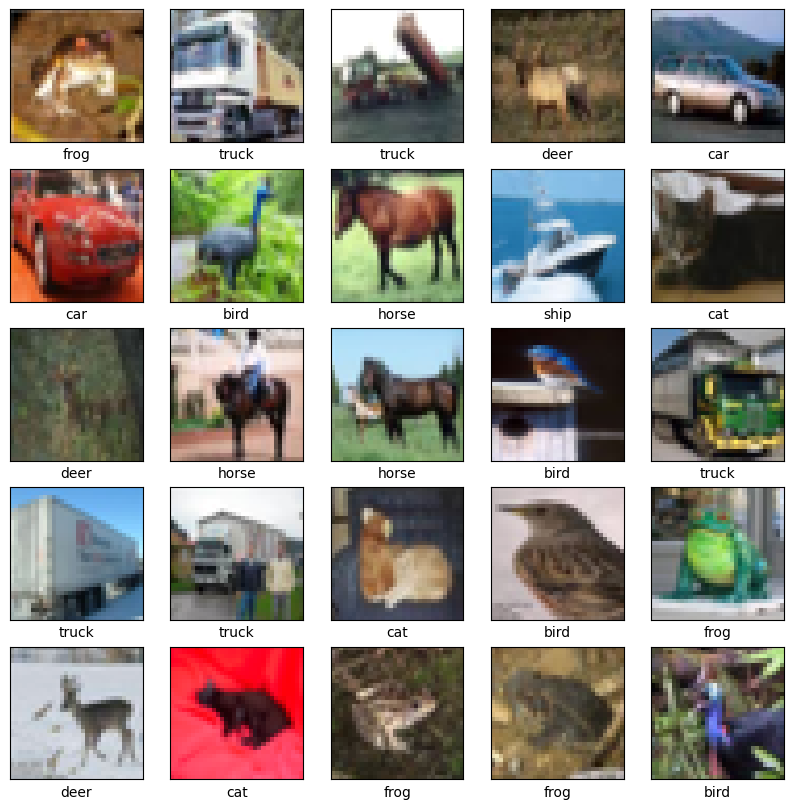

In [ ]:
class_name = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[train_lables[i][0]])
plt.show()


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

c:\Users\rukavishnikovav\Python\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [35]:
history= model.fit(train_images,train_lables,epochs=20,validation_data=(test_images,test_lables))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.8134 - loss: 0.5279 - val_accuracy: 0.7048 - val_loss: 0.9086
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.8296 - loss: 0.4849 - val_accuracy: 0.7073 - val_loss: 0.9248
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8394 - loss: 0.4572 - val_accuracy: 0.7084 - val_loss: 0.9314
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8538 - loss: 0.4113 - val_accuracy: 0.7062 - val_loss: 0.9703
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8620 - loss: 0.3894 - val_accuracy: 0.7100 - val_loss: 1.0250
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8707 - loss: 0.3662 - val_accuracy: 0.7070 - val_loss: 1.0855
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8787 - loss: 0.3401 - val_accuracy: 0.6941 - val_loss: 1.1376
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8897 -

In [33]:
history.history

{'accuracy': [0.44896000623703003,
  0.601639986038208,
  0.656220018863678,
  0.6937400102615356,
  0.7164400219917297,
  0.7382199764251709,
  0.7545400261878967,
  0.770799994468689,
  0.7826200127601624,
  0.7958999872207642],
 'loss': [1.503464698791504,
  1.13091242313385,
  0.9747453331947327,
  0.8797981142997742,
  0.8048840761184692,
  0.7456400990486145,
  0.6970358490943909,
  0.6526161432266235,
  0.6167669892311096,
  0.5760042071342468],
 'val_accuracy': [0.5310999751091003,
  0.6197999715805054,
  0.6381999850273132,
  0.6891000270843506,
  0.6915000081062317,
  0.7050999999046326,
  0.7156999707221985,
  0.6973000168800354,
  0.6995999813079834,
  0.7105000019073486],
 'val_loss': [1.3257964849472046,
  1.071838140487671,
  1.0395976305007935,
  0.9064245820045471,
  0.89383864402771,
  0.8728806376457214,
  0.8519031405448914,
  0.9051263928413391,
  0.8980160355567932,
  0.9061577916145325]}

313/313 - 1s - 4ms/step - accuracy: 0.6834 - loss: 1.8245


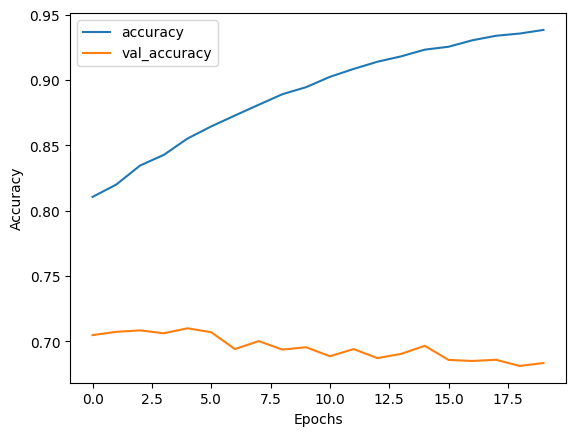

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim([0.5,1])
plt.legend()

test_loss, test_acc = model.evaluate(test_images,test_lables,verbose=2)


In [37]:
test_acc

0.6833999752998352

In [20]:
model.save_weights('cnn.weights.h5')